In [47]:
import h2o
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from h2o.estimators.glrm import H2OGeneralizedLowRankEstimator
from h2o.estimators import glrm
import os

import uyulala


In [9]:

assets = 'AllStocks'   # Typically AllStocks, SchwabOneSource, or Test
horizon = 2       # prediction horizon in days

totalBuildTimeAllowed_seconds = 3600


startDate = '2014-01-01'


##################################################################################
###########################       Imports       ##################################
##################################################################################

from multiprocessing import Pool
import pandas
import os
import uyulala
#reload(uyulala)

import datetime
import numpy
import random
import string
import subprocess
import time
from psutil import virtual_memory

totMem = virtual_memory().total
availMem = virtual_memory().available

folderName = 'Assets-'+assets+'--Hrzn-'+str(horizon)



In [3]:

h2o.init()
h2o.remove_all() # Clean slate - just in case the cluster was already running


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_101"; Java(TM) SE Runtime Environment (build 1.8.0_101-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.101-b13, mixed mode)
  Starting server from /Users/Damian/.local/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/5b/s4769fcn60d842cy18f7nc3h0000gn/T/tmpu4bpx188
  JVM stdout: /var/folders/5b/s4769fcn60d842cy18f7nc3h0000gn/T/tmpu4bpx188/h2o_Damian_started_from_python.out
  JVM stderr: /var/folders/5b/s4769fcn60d842cy18f7nc3h0000gn/T/tmpu4bpx188/h2o_Damian_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,22 days
H2O cluster name:,H2O_from_python_Damian_4ei8gi
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,24
H2O cluster allowed cores:,24
H2O cluster status:,"accepting new members, healthy"


In [86]:

# Import walking gait data
labeled = h2o.import_file(path=os.path.join(uyulala.dataDir,'labeled',folderName),pattern = ".*\.csv")

labeled.describe()


Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:6473830
Cols:9




,Date,Symbol,DateCol,lab_lowPercentChange_H1,lab_lowPercentChange_H4,lab_absolutePercentChange_H1High,lab_absolutePercentChange_H4High,lab_buy_H2High_0.01,lab_percentChange_H2High
type,time,enum,time,real,real,real,real,enum,real
mins,1388620800000.0,,1388620800000.0,-14.116883116883116,-13.98051948051948,0.0,0.0,,-14.536423841059603
mean,1493990751478.3674,,1493990751478.3674,-0.014369879342446181,-0.03232857328541319,0.024928598628078006,0.04450046877399923,,0.026825283489793156
maxs,1582243200000.0,,1582243200000.0,4011.85046728972,931.1666666666666,4128.672897196262,4128.672897196262,,4128.672897196262
sigma,55763225586.450066,,55763225586.450066,1.686451182372108,0.5117129971591226,1.7469493180940636,3.328114499818516,,2.4234752447166046
zeros,0,,0,161835,101309,162523,95857,,129078
missing,0,0,0,11606,29015,11606,29015,0,17409
0,2014-01-02 00:00:00,A,2014-01-02 00:00:00,0.002897023966289161,0.002897023966289161,0.02317619173031347,0.04055833552804844,True,0.02317619173031347
1,2014-01-03 00:00:00,A,2014-01-03 00:00:00,-0.008279430789133254,-0.008279430789133254,0.003880983182406173,0.027943078913324666,True,0.019922380336351957
2,2014-01-06 00:00:00,A,2014-01-06 00:00:00,0.003911342894393705,0.003911342894393705,0.02790091264667537,0.03754889178617986,True,0.03024771838331151


In [29]:
labeled.drop('Date').drop('DateCol').drop('Symbol').columns

['lab_lowPercentChange_H1',
 'lab_lowPercentChange_H4',
 'lab_absolutePercentChange_H1High',
 'lab_absolutePercentChange_H4High',
 'lab_buy_H2High_0.01',
 'lab_percentChange_H2High']

In [66]:

# Basic GLRM using quadratic loss and no regularization (PCA)
model = H2OGeneralizedLowRankEstimator(k=2, loss="Quadratic", regularization_x="None", regularization_y="None", max_iterations=1000)
model.train(x=labeled.drop('Date').drop('DateCol').drop('Symbol').drop('lab_buy_H2High_0.01').columns, training_frame=labeled.na_omit())
#model.show()


glrm Model Build progress: |██████████████████████████████████████████████| 100%


In [67]:
model

Model Details
H2OGeneralizedLowRankEstimator :  Generalized Low Rank Modeling
Model Key:  GLRM_model_python_1582859178157_8


Model Summary: 


,,number_of_iterations,final_step_size,final_objective_value
0,,8.0,0.000088,3.193412e+07




ModelMetricsGLRM: glrm
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 31934121.4089105
Misclassification Error (Categorical): 0.0

Scoring History: 


,,timestamp,duration,iterations,step_size,objective
0,,2020-02-28 20:55:28,11.005 sec,0.0,0.666667,3.193412e+07
1,,2020-02-28 20:55:30,12.145 sec,1.0,0.444444,3.193412e+07
2,,2020-02-28 20:55:30,12.479 sec,2.0,0.222222,3.193412e+07
3,,2020-02-28 20:55:31,13.460 sec,3.0,0.074074,3.193412e+07
4,,2020-02-28 20:55:31,13.801 sec,4.0,0.018519,3.193412e+07
5,,2020-02-28 20:55:32,14.831 sec,5.0,0.003704,3.193412e+07
6,,2020-02-28 20:55:33,15.162 sec,6.0,0.000617,3.193412e+07
7,,2020-02-28 20:55:34,16.132 sec,7.0,0.000088,3.193412e+07


In [60]:

# Archetype to feature mapping (Y)
print(model._model_json["output"]["archetypes"])
print(model._model_json["output"])


Archetypes: 


,,lab_lowpercentchange_h1,lab_lowpercentchange_h4,lab_absolutepercentchange_h1high,lab_absolutepercentchange_h4high,lab_percentchange_h2high
0,Arch1,-0.014992,-0.032329,0.024279,0.043860,0.026174
1,Arch2,4011.850467,-0.088785,4128.672897,4128.672897,4128.672897




Model Summary: 


,,number_of_iterations,final_step_size,final_objective_value
0,,8.0,0.000088,3.193412e+07



Scoring History: 


,,timestamp,duration,iterations,step_size,objective
0,,2020-02-27 22:36:54,3.620 sec,0.0,0.666667,3.193412e+07
1,,2020-02-27 22:36:54,3.951 sec,1.0,0.444444,3.193412e+07
2,,2020-02-27 22:36:55,4.289 sec,2.0,0.222222,3.193412e+07
3,,2020-02-27 22:36:55,4.624 sec,3.0,0.074074,3.193412e+07
4,,2020-02-27 22:36:55,4.959 sec,4.0,0.018519,3.193412e+07
5,,2020-02-27 22:36:56,5.315 sec,5.0,0.003704,3.193412e+07
6,,2020-02-27 22:36:57,6.499 sec,6.0,0.000617,3.193412e+07
7,,2020-02-27 22:36:57,6.833 sec,7.0,0.000088,3.193412e+07



ModelMetricsGLRM: glrm
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 31934121.4089105
Misclassification Error (Categorical): 0.0

Archetypes: 


,,lab_lowpercentchange_h1,lab_lowpercentchange_h4,lab_absolutepercentchange_h1high,lab_absolutepercentchange_h4high,lab_percentchange_h2high
0,Arch1,-0.014992,-0.032329,0.024279,0.043860,0.026174
1,Arch2,4011.850467,-0.088785,4128.672897,4128.672897,4128.672897



Importance of components: 


,,pc1,pc2
0,Standard deviation,4.074389,1.258080
1,Proportion of Variance,0.717449,0.068404
2,Cumulative Proportion,0.717449,0.785854


{'__meta': {'schema_version': 3, 'schema_name': 'GLRMModelOutputV3', 'schema_type': 'GLRMOutput'}, 'names': ['lab_lowPercentChange_H1', 'lab_lowPercentChange_H4', 'lab_absolutePercentChange_H1High', 'lab_absolutePercentChange_H4High', 'lab_percentChange_H2High'], 'column_types': ['Numeric', 'Numeric', 'Numeric', 'Numeric', 'Numeric'], 'domains': [None, None, None, None, None], 'cross_validation_models': None, 'cross_validation_predictions': None, 'cross_validation_holdout_predictions_frame_id': None, 'cross_validation_fold_assignment_frame_id': None, 'model_category': 'DimReduction', 'model_summary': , 'scoring_history': , 'training_metrics': , 'validation_metrics': None, 'cross_validation_metrics': None, 'cross_validation_metrics_summary': None, 'status': None, 'start_time': 1582864610828, 'end_time': 1582864617863, 'run_time': 7035, 'help': {'domains': 'Domains for categorical columns', '__meta': 'Metadata on this schema instance, to make it self-describing.', 'help': 'Help informati

In [68]:
pred = model.predict(labeled)

glrm prediction progress: |███████████████████████████████████████████████| 100%


In [69]:
pred.head()

reconstr_lab_lowPercentChange_H1,reconstr_lab_lowPercentChange_H4,reconstr_lab_absolutePercentChange_H1High,reconstr_lab_absolutePercentChange_H4High,reconstr_lab_percentChange_H2High
-47.7063,0.0242505,-49.1239,-49.138,-49.1253
-85.767,-0.0408693,-88.212,-88.1861,-88.2095
-35.0614,-0.0181055,-36.0592,-36.0477,-36.0581
35.7517,0.00138711,36.7901,36.7888,36.7899
29.722,0.0401604,30.5374,30.5127,30.535
34.1692,-0.0168816,35.1839,35.1937,35.1849
-109.557,0.0164531,-112.764,-112.773,-112.765
41.9617,0.00455497,43.1768,43.1735,43.1765
-46.6701,0.0151574,-48.0464,-48.055,-48.0473
-69.4154,0.0113275,-71.4488,-71.4547,-71.4493


In [71]:
fitY=h2o.get_frame(model._model_json["output"]["archetypes"])
depl_model = H2OGeneralizedLowRankEstimator(k=2, loss="Quadratic", regularization_x="None", regularization_y="None", max_iterations=1000, init = "User", user_y = fitY)
depl_model.train(x=labeled.drop('Date').drop('DateCol').drop('Symbol').drop('lab_buy_H2High_0.01').columns, training_frame=labeled.na_omit())
depl_model.show()


Archetypes: 


,,lab_lowpercentchange_h1,lab_lowpercentchange_h4,lab_absolutepercentchange_h1high,lab_absolutepercentchange_h4high,lab_percentchange_h2high
0,Arch1,-0.014992,-0.032329,0.024279,0.043860,0.026174
1,Arch2,4011.850467,-0.088785,4128.672897,4128.672897,4128.672897



Archetypes: 


,,lab_lowpercentchange_h1,lab_lowpercentchange_h4,lab_absolutepercentchange_h1high,lab_absolutepercentchange_h4high,lab_percentchange_h2high
0,Arch1,-0.014992,-0.032329,0.024279,0.043860,0.026174
1,Arch2,4011.850467,-0.088785,4128.672897,4128.672897,4128.672897


H2OTypeError: Argument `frame_id` should be a string, got H2OTwoDimTable 


Archetypes: 


,,lab_lowpercentchange_h1,lab_lowpercentchange_h4,lab_absolutepercentchange_h1high,lab_absolutepercentchange_h4high,lab_percentchange_h2high
0,Arch1,-0.014992,-0.032329,0.024279,0.043860,0.026174
1,Arch2,4011.850467,-0.088785,4128.672897,4128.672897,4128.672897


In [59]:
labeled.drop('Date').drop('DateCol').drop('Symbol').drop('lab_buy_H2High_0.01')

lab_lowPercentChange_H1,lab_lowPercentChange_H4,lab_absolutePercentChange_H1High,lab_absolutePercentChange_H4High,lab_percentChange_H2High
0.00289702,0.00289702,0.0231762,0.0405583,0.0231762
-0.00827943,-0.00827943,0.00388098,0.0279431,0.0199224
0.00391134,0.00391134,0.0279009,0.0375489,0.0302477
0.00958549,0.00958549,0.0235751,0.0458549,0.0292746
-0.0043235,-0.0043235,0.0104273,0.033825,0.0119532
0.00152284,0.00152284,0.00989848,0.0340102,0.0246193
0.00429618,0.00429618,0.0202173,0.0351276,0.0272934
0.00702811,0.00702811,0.0203313,0.0288655,0.0225904
0.00372393,0.000744786,0.0114201,0.0233366,0.0168818
0.00147929,-0.0138067,0.00986193,0.0162722,0.0106016


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,1 day 0 hours 18 mins
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,23 days
H2O cluster name:,H2O_from_python_Damian_4ei8gi
H2O cluster total nodes:,1
H2O cluster free memory:,3.533 Gb
H2O cluster total cores:,24
H2O cluster allowed cores:,24
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:151
Cols:124




,Time,R.ASIS.X,R.ASIS.Y,R.ASIS.Z,L.ASIS.X,L.ASIS.Y,L.ASIS.Z,V.Sacral.X,V.Sacral.Y,V.Sacral.Z,R.Thigh.Upper.X,R.Thigh.Upper.Y,R.Thigh.Upper.Z,R.Thigh.Front.X,R.Thigh.Front.Y,R.Thigh.Front.Z,R.Thigh.Rear.X,R.Thigh.Rear.Y,R.Thigh.Rear.Z,L.Thigh.Upper.X,L.Thigh.Upper.Y,L.Thigh.Upper.Z,L.Thigh.Front.X,L.Thigh.Front.Y,L.Thigh.Front.Z,L.Thigh.Rear.X,L.Thigh.Rear.Y,L.Thigh.Rear.Z,R.Shank.Upper.X,R.Shank.Upper.Y,R.Shank.Upper.Z,R.Shank.Front.X,R.Shank.Front.Y,R.Shank.Front.Z,R.Shank.Rear.X,R.Shank.Rear.Y,R.Shank.Rear.Z,L.Shank.Upper.X,L.Shank.Upper.Y,L.Shank.Upper.Z,L.Shank.Front.X,L.Shank.Front.Y,L.Shank.Front.Z,L.Shank.Rear.X,L.Shank.Rear.Y,L.Shank.Rear.Z,R.Heel.X,R.Heel.Y,R.Heel.Z,R.Midfoot.Sup.X,R.Midfoot.Sup.Y,R.Midfoot.Sup.Z,R.Midfoot.Lat.X,R.Midfoot.Lat.Y,R.Midfoot.Lat.Z,R.Toe.Tip.X,R.Toe.Tip.Y,R.Toe.Tip.Z,L.Heel.X,L.Heel.Y,L.Heel.Z,L.Midfoot.Sup.X,L.Midfoot.Sup.Y,L.Midfoot.Sup.Z,L.Midfoot.Lat.X,L.Midfoot.Lat.Y,L.Midfoot.Lat.Z,L.Toe.Tip.X,L.Toe.Tip.Y,L.Toe.Tip.Z,Sternum.X,Sternum.Y,Sternum.Z,R.Acromium.X,R.Acromium.Y,R.Acromium.Z,L.Acromium.X,L.Acromium.Y,L.Acromium.Z,R.Bicep.X,R.Bicep.Y,R.Bicep.Z,L.Bicep.X,L.Bicep.Y,L.Bicep.Z,R.Elbow.X,R.Elbow.Y,R.Elbow.Z,L.Elbow.X,L.Elbow.Y,L.Elbow.Z,R.Wrist.Med.X,R.Wrist.Med.Y,R.Wrist.Med.Z,R.Wrist.Lat.X,R.Wrist.Lat.Y,R.Wrist.Lat.Z,L.Wrist.Med.X,L.Wrist.Med.Y,L.Wrist.Med.Z,L.Wrist.Lat.X,L.Wrist.Lat.Y,L.Wrist.Lat.Z,R.Toe.Lat.X,R.Toe.Lat.Y,R.Toe.Lat.Z,R.Toe.Med.X,R.Toe.Med.Y,R.Toe.Med.Z,L.Toe.Lat.X,L.Toe.Lat.Y,L.Toe.Lat.Z,L.Toe.Med.X,L.Toe.Med.Y,L.Toe.Med.Z,R.Temple.X,R.Temple.Y,R.Temple.Z,L.Temple.X,L.Temple.Y,L.Temple.Z,Top.Head.X,Top.Head.Y,Top.Head.Z
type,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,0.0,588.90717,1042.57324,107.79163,600.01556,1028.72498,-152.53879,399.40009,1034.90125,-21.44083,481.83603,732.70135,169.71159,535.63422,657.21033,74.20708,443.03299,613.54547,168.15961,468.19415,737.72083,-194.25998,550.69415,684.75494,-133.588,435.01773,627.49988,-170.86086,319.34705,444.43289,157.69023,376.44724,403.25574,102.54192,293.89526,368.28577,165.6133,341.2023,438.80435,-172.96315,365.72482,375.95242,-120.97533,304.46347,393.67728,-173.38676,68.60076,56.43383,59.948,190.98845,76.90237,57.86759,157.32503,62.79,159.97461,242.90858,33.52863,102.0894,76.37951,58.7473,-74.0361,211.85968,69.02702,-69.30095,185.39088,48.22646,-140.09074,254.42706,36.65646,-88.18266,627.38177,1342.85413,-35.20795,511.80032,1427.44507,164.48206,551.72424,1453.58936,-249.89265,485.94559,1227.90454,216.05853,531.12134,1217.64429,-266.60974,424.32767,1129.09949,242.29697,460.03223,1123.80298,-304.79358,535.87439,889.81964,262.1105,486.99316,876.53882,304.71069,554.35272,895.92426,-240.59163,502.82971,886.58942,-300.87775,179.7708,33.33099,181.24631,218.04131,36.96362,71.79319,199.80693,36.02512,-153.13719,228.04898,42.9706,-54.88903,675.97009,1562.28418,44.15432,683.50897,1567.27209,-94.07465,614.13971,1740.38916,-19.48838
mean,1.25,613.8130531125828,1066.0396608609274,147.31687456953642,621.7555214569536,1053.963569668874,-113.08985682119206,419.6205819205298,1059.0900681456953,21.62349145695364,604.8936437086091,752.1138705960265,198.39496721854306,673.9218970198675,697.9239713907284,108.98507715231788,611.8222588741722,633.8688175496688,191.19985695364235,585.4907751655628,756.9971207947019,-165.26850715231788,678.6867554966888,728.6994552980133,-105.36090649006621,595.9400021854303,651.7901406622517,-150.84564834437086,546.59492397351,475

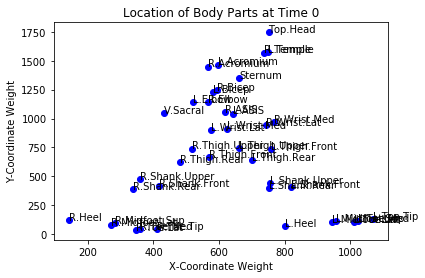

glrm Model Build progress: |██████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLowRankEstimator :  Generalized Low Rank Modeling
Model Key:  GLRM_model_python_1582859178157_14


Model Summary: 


,,number_of_iterations,final_step_size,final_objective_value
0,,15.0,0.000034,278226.186276




ModelMetricsGLRM: glrm
** Reported on train data. **

MSE: NaN
RMSE: NaN
Sum of Squared Error (Numeric): 278226.1909298726
Misclassification Error (Categorical): 0.0

Scoring History: 


,,timestamp,duration,iterations,step_size,objective
0,,2020-02-28 21:24:57,0.033 sec,0.0,1.050000,289342.706669
1,,2020-02-28 21:24:57,0.036 sec,1.0,0.700000,289342.706669
2,,2020-02-28 21:24:57,0.038 sec,2.0,0.466667,289342.706669
3,,2020-02-28 21:24:57,0.040 sec,3.0,0.311111,289342.706669
4,,2020-02-28 21:24:57,0.044 sec,4.0,0.155556,289342.706669
5,,2020-02-28 21:24:57,0.046 sec,5.0,0.051852,289342.706669
6,,2020-02-28 21:24:57,0.048 sec,6.0,0.012963,289342.706669
7,,2020-02-28 21:24:57,0.050 sec,7.0,0.002593,289342.706669
8,,2020-02-28 21:24:57,0.053 sec,8.0,0.002722,278226.186276
9,,2020-02-28 21:24:57,0.055 sec,9.0,0.001815,278226.186276


                timestamp    duration  iterations  step_size      objective
0     2020-02-28 21:24:57   0.033 sec         0.0   1.050000  289342.706669
1     2020-02-28 21:24:57   0.036 sec         1.0   0.700000  289342.706669
2     2020-02-28 21:24:57   0.038 sec         2.0   0.466667  289342.706669
3     2020-02-28 21:24:57   0.040 sec         3.0   0.311111  289342.706669
4     2020-02-28 21:24:57   0.044 sec         4.0   0.155556  289342.706669
5     2020-02-28 21:24:57   0.046 sec         5.0   0.051852  289342.706669
6     2020-02-28 21:24:57   0.048 sec         6.0   0.012963  289342.706669
7     2020-02-28 21:24:57   0.050 sec         7.0   0.002593  289342.706669
8     2020-02-28 21:24:57   0.053 sec         8.0   0.002722  278226.186276
9     2020-02-28 21:24:57   0.055 sec         9.0   0.001815  278226.186276
10    2020-02-28 21:24:57   0.057 sec        10.0   0.001210  278226.186276
11    2020-02-28 21:24:57   0.059 sec        11.0   0.000807  278226.186276
12    2020-0

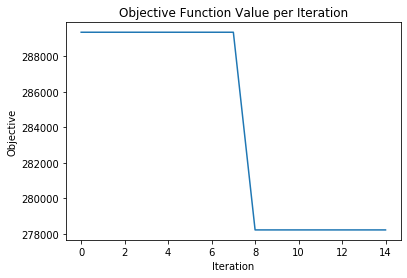


Archetypes: 


,,rasisx,rasisy,rasisz,lasisx,lasisy,lasisz,vsacralx,vsacraly,vsacralz,...,ltoemedz,rtemplex,rtempley,rtemplez,ltemplex,ltempley,ltemplez,topheadx,topheady,topheadz
0,Arch1,636.079269,1058.574905,147.597604,625.970051,1040.550054,-111.766082,434.674100,1045.150173,38.927376,...,-39.927588,704.497932,1594.548227,124.546477,716.223508,1602.988461,-13.267719,682.382497,1768.304547,67.543768
1,Arch2,606.936807,1085.736761,114.801018,616.630523,1062.980519,-145.253134,412.687341,1072.089674,-9.513455,...,-25.254390,703.734508,1606.877804,54.833183,720.982882,1610.241911,-83.124650,709.653398,1783.637832,-7.453142
2,Arch3,608.610415,1046.452804,130.682216,606.838262,1031.911430,-130.274890,410.708033,1037.853438,18.654481,...,-21.805549,682.822151,1593.104131,97.087049,698.191488,1601.050006,-41.048013,649.346621,1767.175007,36.524150
3,Arch4,621.312944,1055.656748,154.839838,644.692212,1049.580916,-105.111139,434.312159,1051.652054,13.714586,...,-20.211575,724.608585,1581.156109,77.247005,738.407037,1582.951646,-61.150447,734.817271,1757.090523,14.257140
4,Arch5,601.280861,1059.635456,116.160936,606.738747,1043.108235,-143.895122,406.467741,1053.993378,-5.422537,...,-31.418034,700.434161,1587.234702,65.578986,717.560561,1592.708899,-72.096774,695.437809,1762.670658,5.343321
5,Arch6,595.268914,1053.041102,175.329113,615.043926,1044.601126,-85.312942,406.688600,1052.047348,37.198388,...,-28.001799,696.066843,1593.783385,109.001990,705.287583,1597.563426,-29.983266,676.963097,1765.058268,46.784407
6,Arch7,618.150189,1047.914259,127.494669,613.371408,1034.814156,-133.856880,419.270300,1043.157245,15.854112,...,-39.963073,721.150386,1563.044475,94.917755,736.526937,1568.411875,-42.861237,739.699716,1741.778132,37.493328
7,Arch8,625.355265,1078.942538,168.294127,619.855629,1068.081686,-92.613926,423.947782,1069.652280,51.120108,...,-39.755645,704.261804,1613.359288,136.724308,714.801272,1622.579749,-2.018333,692.517725,1790.063128,81.442335
8,Arch9,605.407408,1073.552065,178.678233,611.403501,1069.330638,-82.403468,409.662134,1072.361307,51.843256,...,-47.241444,695.654629,1618.386248,129.795644,703.486759,1625.399040,-9.209950,671.181408,1790.876350,71.005525
9,Arch10,624.600603,1081.267760,126.882991,641.437380,1068.396023,-133.070293,434.612094,1070.297252,-5.331180,...,-26.168753,718.329049,1606.305206,52.570067,734.035657,1607.251628,-85.770567,727.686321,1782.371578,-12.261781


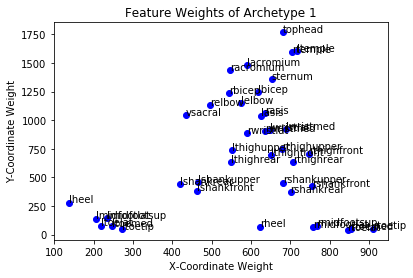

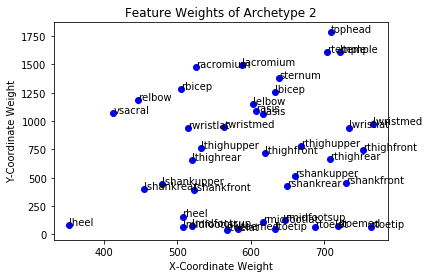

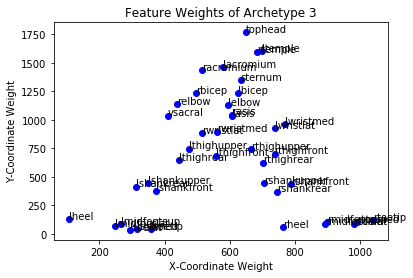

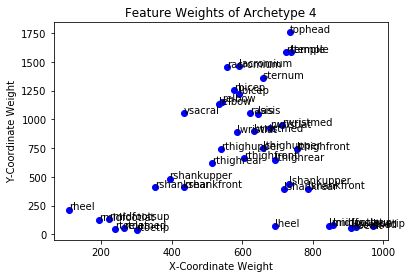

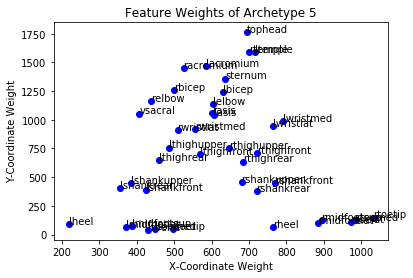

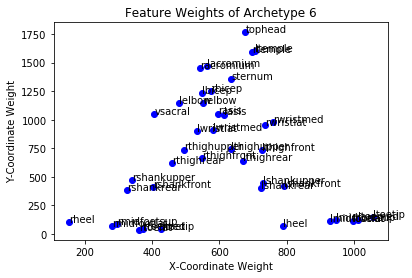

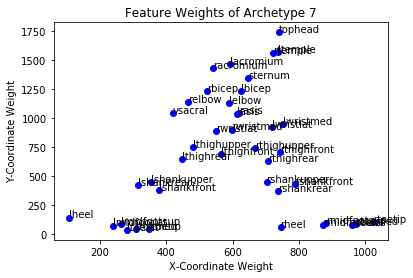

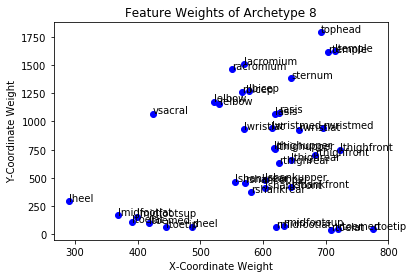

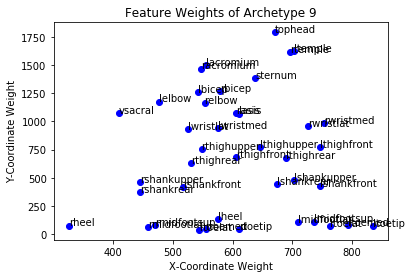

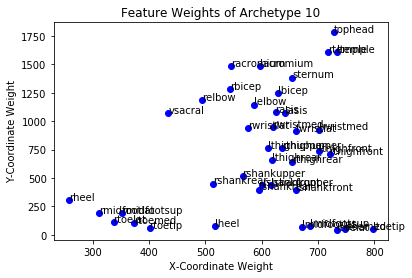

Arch1,Arch2,Arch3,Arch4,Arch5,Arch6,Arch7,Arch8,Arch9,Arch10
0.568118,-0.0857611,-0.785306,0.436985,0.529129,0.837623,0.192354,-0.448136,0.00532702,-0.235831
0.516406,-0.0606666,-0.688768,0.655686,0.494506,0.660879,0.140461,-0.408441,0.0130792,-0.310325
0.46374,-0.0283086,-0.579482,0.8796,0.441189,0.477826,0.0973758,-0.378017,0.0239001,-0.38636
0.420546,-0.00399584,-0.483621,1.06731,0.388924,0.307873,0.0592625,-0.353008,0.0402118,-0.433384
0.381586,0.0210186,-0.40571,1.22594,0.344982,0.14707,0.0197975,-0.320625,0.0529539,-0.45811
0.329933,0.0324595,-0.334967,1.32452,0.283275,0.0211865,0.0145756,-0.282622,0.0558198,-0.436093
0.290013,0.0290315,-0.298681,1.37171,0.240314,-0.0946183,0.0159675,-0.24876,0.0729058,-0.370828
0.267206,0.0115823,-0.278507,1.35886,0.206645,-0.17133,0.0200725,-0.223951,0.0755952,-0.259955
0.250826,-0.0275103,-0.262083,1.29963,0.186392,-0.217675,0.0252825,-0.205734,0.0675048,-0.110901
0.241204,-0.0825405,-0.252981,1.17632,0.164437,-0.226186,0.0444285,-0.199681,0.0574966,0.0827695


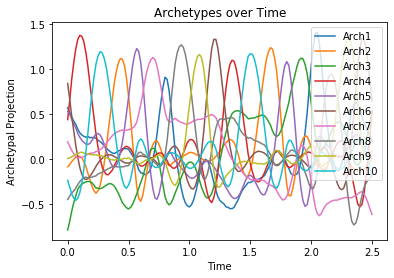

glrm prediction progress: |███████████████████████████████████████████████| 100%


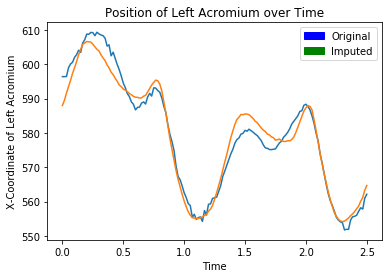

In [80]:


import h2o
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from h2o.estimators.glrm import H2OGeneralizedLowRankEstimator
import os


# In[ ]:

h2o.init()
h2o.remove_all() # Clean slate - just in case the cluster was already running


# Import walking gait data
gait = h2o.import_file(path=os.path.realpath("/Users/Damian/subject01_walk1.csv"))
gait.describe()


# In[ ]:

# Plot first row of data on x- vs. y-coordinate features
gait_row = gait[1,:].drop("Time")
gait_row_np = np.array(h2o.as_list(gait_row))
x_coords = range(0, gait_row_np.shape[1], 3)
y_coords = range(1, gait_row_np.shape[1], 3)

x_pts = gait_row_np[0,x_coords]
y_pts = gait_row_np[0,y_coords]
plt.plot(x_pts, y_pts, 'bo')

# Add feature labels to each point
feat_names = [nam[:-2] for nam in gait_row.col_names[1::3]]
for i in range(len(feat_names)):
    plt.annotate(feat_names[i], xy = [x_pts[i], y_pts[i]])
plt.title("Location of Body Parts at Time 0")
plt.xlabel("X-Coordinate Weight")
plt.ylabel("Y-Coordinate Weight")
plt.show()


# In[ ]:

# Basic GLRM using quadratic loss and no regularization (PCA)
model = H2OGeneralizedLowRankEstimator(k=10, loss="Quadratic", regularization_x="None", regularization_y="None", max_iterations=1000)
model.train(x=list(range(1,gait.ncol)), training_frame=gait)
model.show()


# In[ ]:

# Plot objective function value each iteration
model_score = model.score_history()
plt.xlabel("Iteration")
plt.ylabel("Objective")
plt.title("Objective Function Value per Iteration")
print(model_score)
plt.plot(model_score["iterations"], model_score["objective"])
plt.show()


# In[ ]:

# Archetype to feature mapping (Y)
gait_y = model._model_json["output"]["archetypes"]
print(gait_y)

gait_y_np = np.array(model.archetypes())
x_coords = range(0, gait_y_np.shape[1], 3)
y_coords = range(1, gait_y_np.shape[1], 3)

# Plot archetypes on x- vs. y-coordinate features
for k in range(gait_y_np.shape[0]):
    x_pts = gait_y_np[k, x_coords]
    y_pts = gait_y_np[k, y_coords]
    plt.plot(x_pts, y_pts, 'bo')

    # Add feature labels to each point
    feat_names = [nam[:-1] for nam in gait_y.col_header[1::3]]
    for i in range(len(feat_names)):
        plt.annotate(feat_names[i], xy = [x_pts[i], y_pts[i]])
    plt.title("Feature Weights of Archetype " + str(k+1))
    plt.xlabel("X-Coordinate Weight")
    plt.ylabel("Y-Coordinate Weight")
    plt.show()


# In[ ]:

# Projection into archetype space (X)
x_key = model._model_json["output"]["representation_name"]
gait_x = h2o.get_frame(x_key)
gait_x.show()

time_np = np.array(h2o.as_list(gait["Time"]))
gait_x_np = np.array(h2o.as_list(gait_x))

# Plot archetypes over time
lines = []
for i in range(gait_x_np.shape[1]):
    lines += plt.plot(time_np, gait_x_np[:,i], '-')
plt.title("Archetypes over Time")
plt.xlabel("Time")
plt.ylabel("Archetypal Projection")
plt.legend(lines, gait_x.col_names)
plt.show()


# In[ ]:

# Reconstruct data from X and Y
pred = model.predict(gait)
pred.head()


# In[ ]:

# Plot original and reconstructed L.Acromium.X over time
lacro_np = np.array(h2o.as_list(gait["L.Acromium.X"]))
lacro_pred_np = np.array(h2o.as_list(pred["reconstr_L.Acromium.X"]))
line_orig = plt.plot(time_np, lacro_np, '-')
line_imp = plt.plot(time_np, lacro_pred_np, '-')

plt.title("Position of Left Acromium over Time")
plt.xlabel("Time")
plt.ylabel("X-Coordinate of Left Acromium")
blue_patch = mpatches.Patch(color = 'blue', label = 'Original')
orange_patch = mpatches.Patch(color = 'orange', label='Imputed')
plt.legend([blue_patch, green_patch], ["Original", "Imputed"])
plt.show()



In [82]:
pred.head()
## Projection into archetype space (X)
#pred_x_key = pred._model_json["output"]["representation_name"]
#pred_gait_x = h2o.get_frame(pred_x_key)
#pred_gait_x.show()

#pred_time_np = np.array(h2o.as_list(gait["Time"]))
#pred_gait_x_np = np.array(h2o.as_list(pred_gait_x))


reconstr_R.ASIS.X,reconstr_R.ASIS.Y,reconstr_R.ASIS.Z,reconstr_L.ASIS.X,reconstr_L.ASIS.Y,reconstr_L.ASIS.Z,reconstr_V.Sacral.X,reconstr_V.Sacral.Y,reconstr_V.Sacral.Z,reconstr_R.Thigh.Upper.X,reconstr_R.Thigh.Upper.Y,reconstr_R.Thigh.Upper.Z,reconstr_R.Thigh.Front.X,reconstr_R.Thigh.Front.Y,reconstr_R.Thigh.Front.Z,reconstr_R.Thigh.Rear.X,reconstr_R.Thigh.Rear.Y,reconstr_R.Thigh.Rear.Z,reconstr_L.Thigh.Upper.X,reconstr_L.Thigh.Upper.Y,reconstr_L.Thigh.Upper.Z,reconstr_L.Thigh.Front.X,reconstr_L.Thigh.Front.Y,reconstr_L.Thigh.Front.Z,reconstr_L.Thigh.Rear.X,reconstr_L.Thigh.Rear.Y,reconstr_L.Thigh.Rear.Z,reconstr_R.Shank.Upper.X,reconstr_R.Shank.Upper.Y,reconstr_R.Shank.Upper.Z,reconstr_R.Shank.Front.X,reconstr_R.Shank.Front.Y,reconstr_R.Shank.Front.Z,reconstr_R.Shank.Rear.X,reconstr_R.Shank.Rear.Y,reconstr_R.Shank.Rear.Z,reconstr_L.Shank.Upper.X,reconstr_L.Shank.Upper.Y,reconstr_L.Shank.Upper.Z,reconstr_L.Shank.Front.X,reconstr_L.Shank.Front.Y,reconstr_L.Shank.Front.Z,reconstr_L.Shank.Rear.X,reconstr_L.Shank.Rear.Y,reconstr_L.Shank.Rear.Z,reconstr_R.Heel.X,reconstr_R.Heel.Y,reconstr_R.Heel.Z,reconstr_R.Midfoot.Sup.X,reconstr_R.Midfoot.Sup.Y,reconstr_R.Midfoot.Sup.Z,reconstr_R.Midfoot.Lat.X,reconstr_R.Midfoot.Lat.Y,reconstr_R.Midfoot.Lat.Z,reconstr_R.Toe.Tip.X,reconstr_R.Toe.Tip.Y,reconstr_R.Toe.Tip.Z,reconstr_L.Heel.X,reconstr_L.Heel.Y,reconstr_L.Heel.Z,reconstr_L.Midfoot.Sup.X,reconstr_L.Midfoot.Sup.Y,reconstr_L.Midfoot.Sup.Z,reconstr_L.Midfoot.Lat.X,reconstr_L.Midfoot.Lat.Y,reconstr_L.Midfoot.Lat.Z,reconstr_L.Toe.Tip.X,reconstr_L.Toe.Tip.Y,reconstr_L.Toe.Tip.Z,reconstr_Sternum.X,reconstr_Sternum.Y,reconstr_Sternum.Z,reconstr_R.Acromium.X,reconstr_R.Acromium.Y,reconstr_R.Acromium.Z,reconstr_L.Acromium.X,reconstr_L.Acromium.Y,reconstr_L.Acromium.Z,reconstr_R.Bicep.X,reconstr_R.Bicep.Y,reconstr_R.Bicep.Z,reconstr_L.Bicep.X,reconstr_L.Bicep.Y,reconstr_L.Bicep.Z,reconstr_R.Elbow.X,reconstr_R.Elbow.Y,reconstr_R.Elbow.Z,reconstr_L.Elbow.X,reconstr_L.Elbow.Y,reconstr_L.Elbow.Z,reconstr_R.Wrist.Med.X,reconstr_R.Wrist.Med.Y,reconstr_R.Wrist.Med.Z,reconstr_R.Wrist.Lat.X,reconstr_R.Wrist.Lat.Y,reconstr_R.Wrist.Lat.Z,reconstr_L.Wrist.Med.X,reconstr_L.Wrist.Med.Y,reconstr_L.Wrist.Med.Z,reconstr_L.Wrist.Lat.X,reconstr_L.Wrist.Lat.Y,reconstr_L.Wrist.Lat.Z,reconstr_R.Toe.Lat.X,reconstr_R.Toe.Lat.Y,reconstr_R.Toe.Lat.Z,reconstr_R.Toe.Med.X,reconstr_R.Toe.Med.Y,reconstr_R.Toe.Med.Z,reconstr_L.Toe.Lat.X,reconstr_L.Toe.Lat.Y,reconstr_L.Toe.Lat.Z,reconstr_L.Toe.Med.X,reconstr_L.Toe.Med.Y,reconstr_L.Toe.Med.Z,reconstr_R.Temple.X,reconstr_R.Temple.Y,reconstr_R.Temple.Z,reconstr_L.Temple.X,reconstr_L.Temple.Y,reconstr_L.Temple.Z,reconstr_Top.Head.X,reconstr_Top.Head.Y,reconstr_Top.Head.Z
614.225,1059.32,167.503,636.317,1049.34,-95.5657,424.884,1059.87,24.2381,503.728,743.87,209.227,556.382,665.912,121.569,464.451,627.662,198.186,646.093,746.718,-149.586,741.297,736.559,-79.67,681.452,642.533,-137.818,343.807,471.787,185.332,406.702,413.501,133.977,328.65,386.017,189.968,739.93,442.19,-132.17,808.161,413.75,-82.3886,736.757,394.08,-140.235,155.746,103.568,101.339,299.304,86.2898,71.5596,284.75,66.317,180.347,428.499,45.3784,117.435,814.502,63.7248,-54.6733,964.962,116.812,-32.6925,948.592,106.514,-127.589,1073.98,133.377,-62.8717,658.809,1363.87,11.186,567.197,1461.62,223.752,588.017,1475.67,-198.304,594.57,1260.61,275.091,571.993,1237.52,-230.903,567.741,1153.9,312.447,506.26,1148.44,-265.641,773.965,983.277,270.606,750.125,954.464,325.23,610.071,916.252,-226.834,559.241,906.173,-283.085,362.758,30.3837,198.764,376.579,38.8494,86.682,1014.45,104.492,-138.902,1029.57,116.915,-36.2563,731.377,1590.25,94.85,741.877,1592.08,-45.3202,736.903,1764.87,32.5592
616.081,1057.13,166.218,639.019,1048.02,-96.3909,427.315,1057.39,22.4053,504.529,741.799,208.839,557.902,662.923,122.392,465.02,625.398,198.626,651.18,746.143,-149.948,747.258,737.39,-80.8851,687.626,642.62,-137.361,342.855,471.382,186.622,403.38,411.229,135.43,324.922,386.812,191.312,744.963,441.689

In [ ]:

# In[ ]:

# Import walking gait data with missing values
gait_miss = h2o.import_file(path = os.path.realpath("../data/subject01_walk1_miss15.csv"))
gait_miss.describe()


# In[ ]:

# Basic GLRM using quadratic loss and no regularization

model2 = H2OGeneralizedLowRankEstimator(k=10, init="SVD", svd_method = "GramSVD", loss="Quadratic", regularization_x="None", regularization_y="None", max_iterations=2000, min_step_size=1e-6)
model2.train(x=range(1,gait_miss.ncol), training_frame=gait_miss, validation_frame=gait)
model2.show()


# In[ ]:

# Plot objective function value each iteration
model2_score = model2.score_history()
plt.xlabel("Iteration")
plt.ylabel("Objective")
plt.title("Objective Function Value per Iteration")
plt.plot(model2_score["iteration"], model2_score["objective"])
plt.show()


# In[ ]:

# Impute missing data from X and Y
pred2 = model2.predict(gait_miss)
pred2.head()


# In[ ]:

# Plot original and imputed L.Acromium.X over time
lacro_pred_np2 = np.array(h2o.as_list(pred2["reconstr_L.Acromium.X"]))
plt.plot(time_np, lacro_np, 'b-')
plt.plot(time_np, lacro_pred_np2, 'g-')

# Mark points where training data contains missing values
idx_miss = zip(*gait_miss["L.Acromium.X"].isna().which().as_data_frame(True).values.tolist())
plt.plot(time_np[idx_miss], lacro_np[idx_miss], "o", marker = "x", ms = 8, mew = 1.5, mec = "r")

plt.title("Position of Left Acromium over Time")
plt.xlabel("Time")
plt.ylabel("X-Coordinate of Left Acromium")
blue_patch = mpatches.Patch(color = 'blue', label = 'Original')
green_patch = mpatches.Patch(color = 'green', label = 'Imputed')
red_patch = mpatches.Patch(color = 'red', label = "Missing")
plt.legend([blue_patch, green_patch, red_patch], ["Original", "Imputed", "Missing"])
plt.show()


# ### Shut down the cluster
# 
# Shut down the cluster now that we are done using it.

# In[ ]:

h2o.shutdown(prompt=False)

In [88]:
labeled.drop('Date').drop('Symbol').drop('DateCol').head()

lab_lowPercentChange_H1,lab_lowPercentChange_H4,lab_absolutePercentChange_H1High,lab_absolutePercentChange_H4High,lab_buy_H2High_0.01,lab_percentChange_H2High
0.00289702,0.00289702,0.0231762,0.0405583,True,0.0231762
-0.00827943,-0.00827943,0.00388098,0.0279431,True,0.0199224
0.00391134,0.00391134,0.0279009,0.0375489,True,0.0302477
0.00958549,0.00958549,0.0235751,0.0458549,True,0.0292746
-0.0043235,-0.0043235,0.0104273,0.033825,True,0.0119532
0.00152284,0.00152284,0.00989848,0.0340102,True,0.0246193
0.00429618,0.00429618,0.0202173,0.0351276,True,0.0272934
0.00702811,0.00702811,0.0203313,0.0288655,True,0.0225904
0.00372393,0.000744786,0.0114201,0.0233366,True,0.0168818
0.00147929,-0.0138067,0.00986193,0.0162722,True,0.0106016


In [111]:
trn,prdt = labeled.split_frame([.75])

from h2o.estimators.pca import H2OPrincipalComponentAnalysisEstimator as H2OPCA
pca_decomp = H2OPCA(k=2, transform="Standardize", pca_method="GramSVD")
pca_decomp.train(x=trn.drop('Date').drop('DateCol').columns, training_frame=trn)
#pca_decomp


H2OServerError: HTTP 500 Server Error:
Server error water.util.DistributedException:
  Error: DistributedException from /127.0.0.1:54321: 'Java heap space'
  Request: None


In [ ]:

pred = pca_decomp.predict(prdt)
pred.head()

In [ ]:
plt.xlim((-2, 1))
plt.ylim((-2, 2))
plt.plot(pred.as_data_frame()['PC1'].tolist(), pred.as_data_frame()['PC2'].tolist(), 'bo')